In [ ]:
7import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Paths to your dataset
train_dir = '/content/drive/MyDrive/grayscale_train-20240822T062429Z-001/grayscale_train'
test_dir = '/content/drive/MyDrive/grayscale_train-20240822T062429Z-001/grayscale_train'

# ImageDataGenerator for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directories with an 80:20 split for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

# Create the base model from VGG16 with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modify the input layer to accept grayscale images (1 channel)
input_layer = tf.keras.layers.Input(shape=(224, 224, 1))
x = tf.keras.layers.Conv2D(3, (3, 3), padding='same')(input_layer)
x = base_model(x, training=False)

# Add custom layers on top
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=50,
    shuffle=False  # As per your requirement
)

# Evaluate the model on the test set
test_generator.reset()
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)
y_true = test_generator.classes

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Save the model
model.save('/content/drive/MyDrive/vgg16_model.h5')


Found 2268 images belonging to 2 classes.
Found 2268 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 1368s 19s/step - accuracy: 0.6297 - loss: 6.4908 - val_accuracy: 0.6687 - val_loss: 0.6784
Epoch 2/50
 1/70 ━━━━━━━━━━━━━━━━━━━━ 41:07 36s/step - accuracy: 0.6429 - loss: 0.6808

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


70/70 ━━━━━━━━━━━━━━━━━━━━ 47s 169ms/step - accuracy: 0.6429 - loss: 0.6808 - val_accuracy: 0.8214 - val_loss: 0.6629
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.6703 - loss: 0.6692 - val_accuracy: 0.6687 - val_loss: 0.6465
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6071 - loss: 0.6703 - val_accuracy: 0.8214 - val_loss: 0.5863
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.6650 - loss: 0.6433 - val_accuracy: 0.6719 - val_loss: 0.6336
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6071 - loss: 0.6747 - val_accuracy: 0.5714 - val_loss: 0.6974
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6648 - loss: 0.6380 - val_accuracy: 0.6723 - val_loss: 0.6326
Epoch 8/50
 1/70 ━━━━━━━━━━━━━━━━━━━━ 28s 410ms/step - accuracy: 0.7143 - loss: 0.6034

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


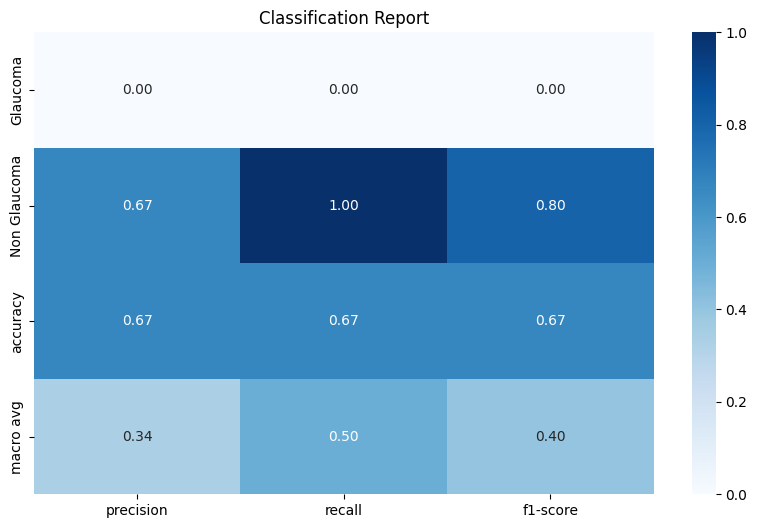

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys(), output_dict=True)

# Convert classification report to a pandas DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt='.2f')
plt.title('Classification Report')
plt.show()


71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 581ms/step


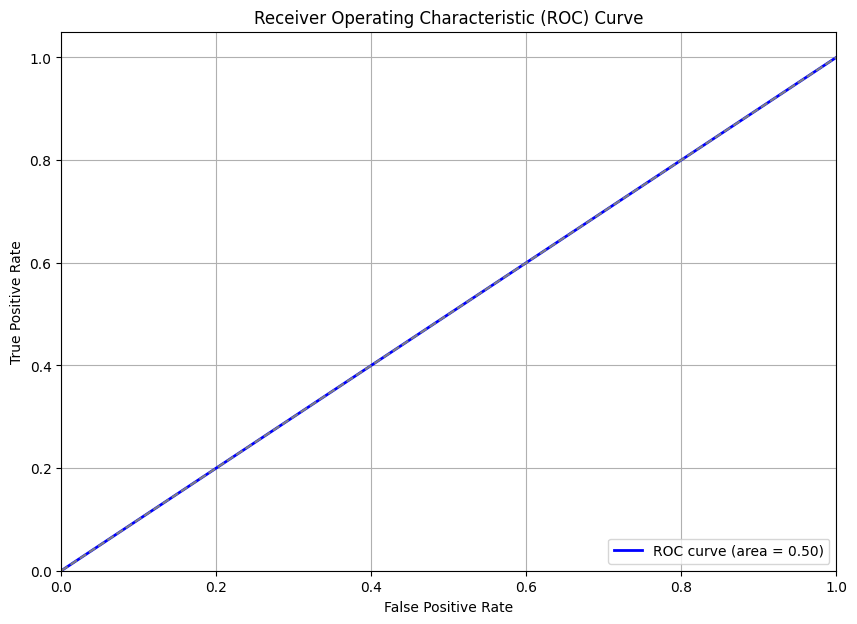

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Evaluate the model on the test set
test_generator.reset()
predictions = model.predict(test_generator)
y_pred_prob = predictions.flatten()  # Flatten the predictions to get probabilities

# Extract the true labels
y_true = test_generator.classes

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


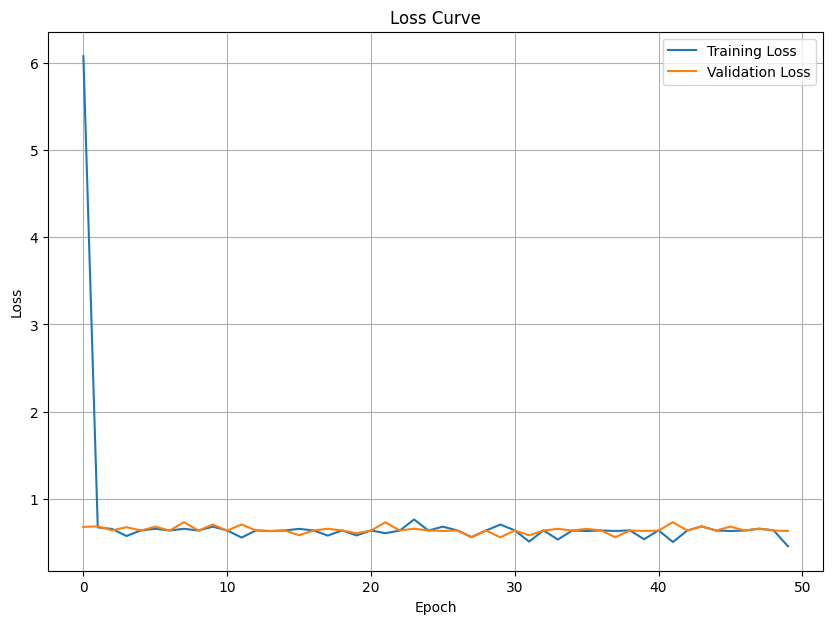

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()


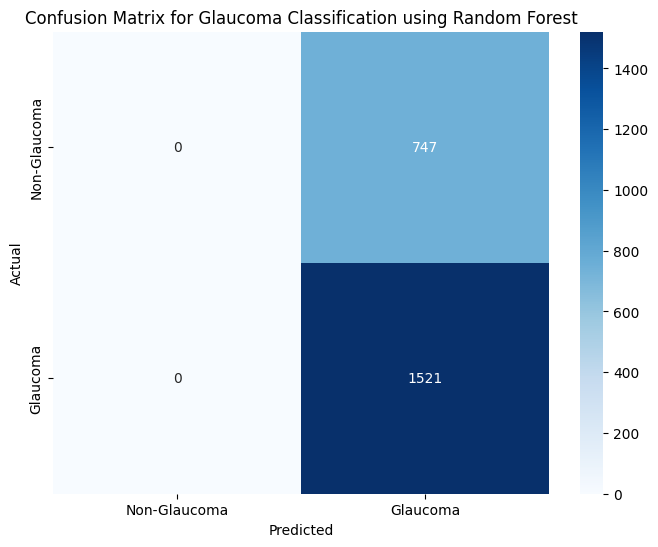

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm=confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Glaucoma', 'Glaucoma'], yticklabels=['Non-Glaucoma', 'Glaucoma'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Glaucoma Classification using Random Forest')
plt.show()